# A4 Machine Learning: Advanced

In this lab, we will provide an interactive application of convolutional neural networks, to classifying images in the CIFAR-10 dataset

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

# Hyperparameters
batch_size = 64
num_classes = 10
epochs = 15
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'




Let's first start by loading the data in. We will use the keras CIFAR-10 dataset as a reference. Each piece of data consists of a representation of a image and a label corresponding to the class (type of object) in the image.

As we usually do in machine learning, let's separate our data into a subset to **train** on and a subset to **test** on.

***Exercise 1:*** Load data in using the imported cifar10 dataset into x_train, y_train, x_test, y_test. What are the dimensions of your train matrix? How many train and test examples do you have?




In [ ]:
# Load data in using the imported cifar10 dataset
# use the variable names x_train, y_train, x_test, y_test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# x_train = x_train.reshape(50000, 3072)
# x_test = x_test.reshape(10000, 3072)
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

We can visualize some of the examples in our dataset.

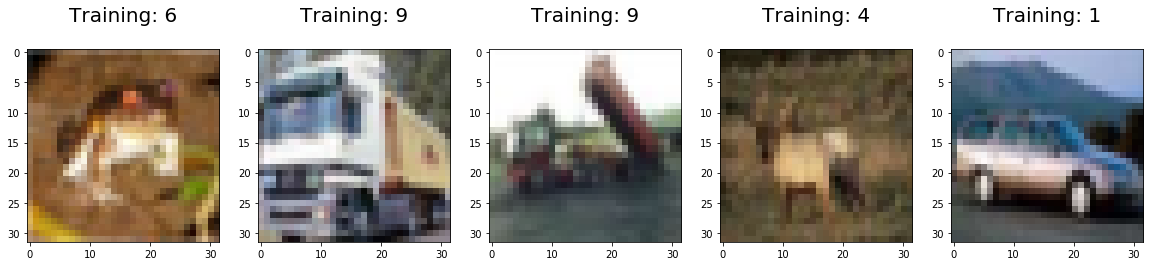

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (32,32,3)) )
    plt.title('Training: %i\n' % label, fontsize = 20)

We preprocess our labels to convert class vectors to binary class matrices.


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Now, we initialize a convolutional neural network.

***Exercise 2***: How many layers does this network have? What activation functions are being used? Give a justification for the choice of activation functions.



In [ ]:
from keras.layers import BatchNormalization
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (4, 4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (6, 6)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (7, 7), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


We now decide how to minimize our loss function (here we use the RMSPropOptimizer)

In [ ]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

It's now time to train our model:

***Exercise 3L*** Fill in the model.fit() command so that it executes with the training, validation data, batch size, and epochs (hint: some of these parameters were defined in the beginning)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# The all important model.fit()
model.fit( x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_split=0.2,
          # fill this in
              shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 9s 235us/step - loss: 1.9842 - acc: 0.2606 - val_loss: 1.7320 - val_acc: 0.3620
Epoch 2/15
40000/40000 [==============================] - 9s 220us/step - loss: 1.6585 - acc: 0.3894 - val_loss: 1.5049 - val_acc: 0.4496
Epoch 3/15
40000/40000 [==============================] - 9s 219us/step - loss: 1.5140 - acc: 0.4470 - val_loss: 1.4408 - val_acc: 0.4740
Epoch 4/15
40000/40000 [==============================] - 9s 222us/step - loss: 1.4202 - acc: 0.4833 - val_loss: 1.3436 - val_acc: 0.5135
Epoch 5/15
40000/40000 [==============================] - 9s 220us/step - loss: 1.3497 - acc: 0.5111 - val_loss: 1.2663 - val_acc: 0.5478
Epoch 6/15
40000/40000 [==============================] - 9s 224us/step - loss: 1.2782 - acc: 0.5422 - val_loss: 1.2249 - val_acc: 0.5667
Epoch 7/15
40000/40000 [==============================] - 9s 221us/step - loss: 1.2230 - acc: 0.5635 - val_loss: 1.1627 - 

We can make some predictions using our trained model on our test dataset.

***Exercise 4:*** In a similar way, after predicting, plot the outputs along with the predictions.

In [ ]:
preds = model.predict(x_test)

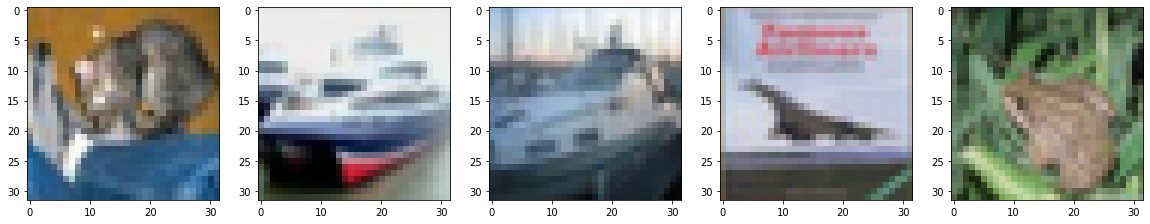

In [ ]:
# Plot some outputs with the predicted label
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_test[0:5], preds[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (32,32,3)) )

Finally, we can compute our classification accuracy, or the percentage of examples in the test subset classified correctly. The following code snippet computes the accuracy.

In [ ]:
# Compute number of examples classified correctly

num_correct = 0
for i in range(len(preds)):
  if np.argmax(preds[i]) == np.argmax(y_test[i]):
    num_correct += 1

print("The fraction of correctly classified examples in the test set is: " + str(num_correct / len(preds)))

The fraction of correctly classified examples in the test set is: 0.1002


We can save and score our model

***Exercise 5:*** Use model.evaluate to evalute the model.


In [ ]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Evalute trained model.


Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 


Can you improve this model?

First try changing hyperparameters + the architecture on your own.

You can also add ***data augmentation*** by visiting [the keras CIFAR-10 code page](https://keras.io/examples/cifar10_cnn/)

This model is not optimized. There are many improvments to be made!